In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the dataset (Make sure the CSV is uploaded to Colab)
df = pd.read_csv('/content/train_revised.csv')


In [ ]:
print("Dataset Shape:", df.shape)

Dataset Shape: (32782, 10)


In [ ]:
df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [ ]:
#  Basic info and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32782 entries, 0 to 32781
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          32782 non-null  int64 
 1   seat_number      32782 non-null  object
 2   payment_method   32782 non-null  object
 3   payment_receipt  32782 non-null  object
 4   travel_date      32782 non-null  object
 5   travel_time      32782 non-null  object
 6   travel_from      32782 non-null  object
 7   travel_to        32782 non-null  object
 8   car_type         32782 non-null  object
 9   max_capacity     32782 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 2.5+ MB


In [ ]:
df.isnull().sum()

,0
ride_id,0
seat_number,0
payment_method,0
payment_receipt,0
travel_date,0
travel_time,0
travel_from,0
travel_to,0
car_type,0
max_capacity,0


In [ ]:
#  Exploratory Data Analysis
print("Unique routes:", df['travel_from'].nunique())

Unique routes: 14


In [ ]:
print(df.columns)

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type',
       'max_capacity'],
      dtype='object')


In [ ]:
# Replace 'departure_timestamp' with the actual name
df['travel_date'] = pd.to_datetime(df['travel_date'])

In [ ]:
# Then extract features
df['day_of_week'] = df['travel_date'].dt.dayofweek

In [ ]:
df['hour'] = df['travel_date'].dt.hour

In [ ]:
df['month'] = df['travel_date'].dt.month

In [ ]:
print(df.columns)

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type',
       'max_capacity', 'day_of_week', 'hour', 'month'],
      dtype='object')


<Axes: xlabel='seat_number', ylabel='Count'>

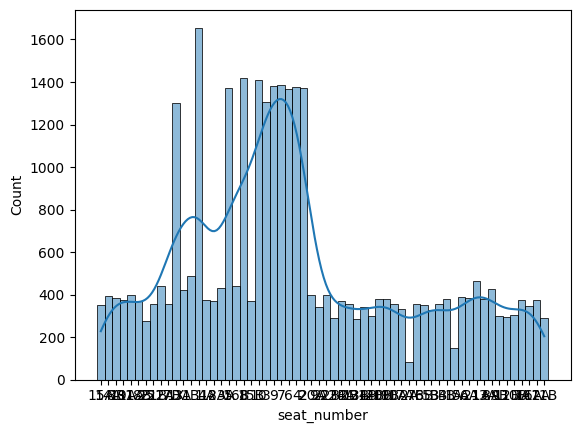

In [ ]:
# Plot target distribution
sns.histplot(df['seat_number'], kde=True)

In [ ]:
print(df.columns)

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type',
       'max_capacity', 'day_of_week', 'hour', 'month'],
      dtype='object')


In [ ]:
print(df.columns.tolist())

['ride_id', 'seat_number', 'payment_method', 'payment_receipt', 'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type', 'max_capacity', 'day_of_week', 'hour', 'month']


In [ ]:
# Count how many rows per ride_id = total seats sold
seat_sales = df.groupby('ride_id').size().reset_index(name='seats_sold')

<Axes: xlabel='seats_sold', ylabel='Count'>

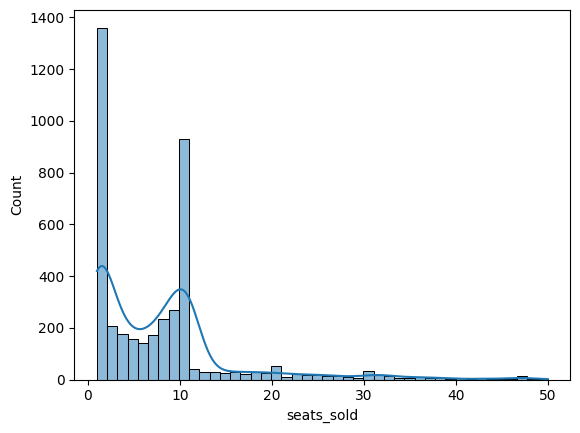

In [ ]:
sns.histplot(seat_sales['seats_sold'], kde=True)

In [ ]:
label_cols = ['travel_from', 'travel_to', 'car_type', 'payment_method']
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [ ]:
# Drop timestamp as we've extracted useful features
df = df.drop(['travel_time'], axis=1)

In [ ]:
print(df.columns)

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_from', 'travel_to', 'car_type', 'max_capacity'],
      dtype='object')


In [ ]:
seat_sales = df.groupby('ride_id').size().reset_index(name='seats_sold')

In [ ]:
ride_features = df.drop_duplicates(subset='ride_id')[
    ['ride_id', 'travel_date', 'travel_from',
     'travel_to', 'car_type', 'payment_method', 'max_capacity',
     'day_of_week', 'hour', 'month']
]

In [ ]:
ride_data = pd.merge(seat_sales, ride_features, on='ride_id', how='left')

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_cols = ['travel_from', 'travel_to', 'car_type', 'payment_method']
for col in label_cols:
    le = LabelEncoder()
    ride_data[col] = le.fit_transform(ride_data[col])

In [ ]:
X = ride_data.drop(['seats_sold', 'ride_id', 'travel_date'], axis=1)

In [ ]:
y = ride_data['seats_sold']

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
# Train a Random Forest model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Predict
y_pred = model.predict(X_test)

In [ ]:
print("MAE:", mean_absolute_error(y_test, y_pred))

MAE: 4.307883472324013


In [ ]:
print("MSE:", mean_squared_error(y_test, y_pred))

MSE: 44.63441372777809


In [ ]:
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE: 6.680899170604065


In [ ]:
print("R2 Score:", r2_score(y_test, y_pred))

R2 Score: 0.28860518078849373


In [ ]:
feature_importance = pd.Series(model.feature_importances_, index=X.columns)

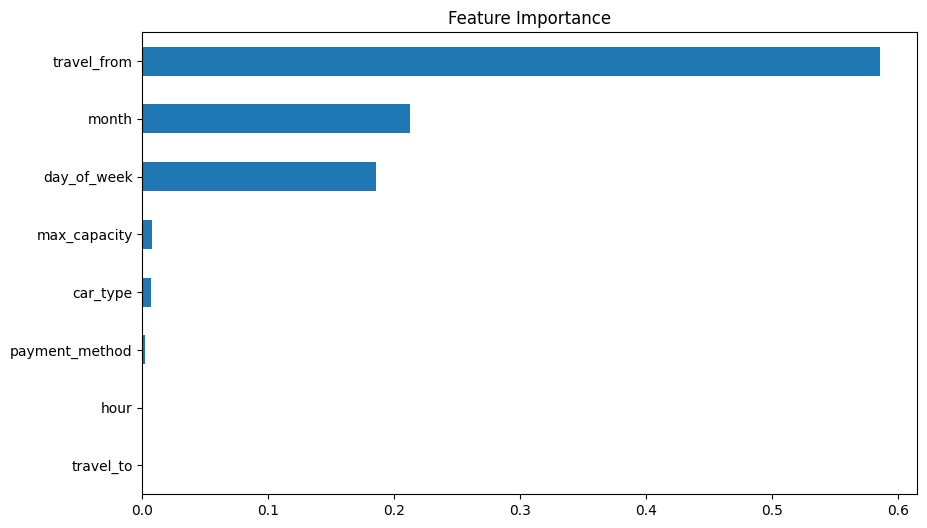

In [ ]:
feature_importance.sort_values(ascending=True).plot(kind='barh', figsize=(10,6))
plt.title("Feature Importance")
plt.show()

<function pandas.core.dtypes.missing.notna(obj: 'object') -> 'bool | npt.NDArray[np.bool_] | NDFrame'>